# Assignment 14: Random Forest 

## Import Libraries & Load  dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_excel('glass.xlsx',sheet_name=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 1.Exploratory Data Analysis (EDA) 

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2.Data Visualization

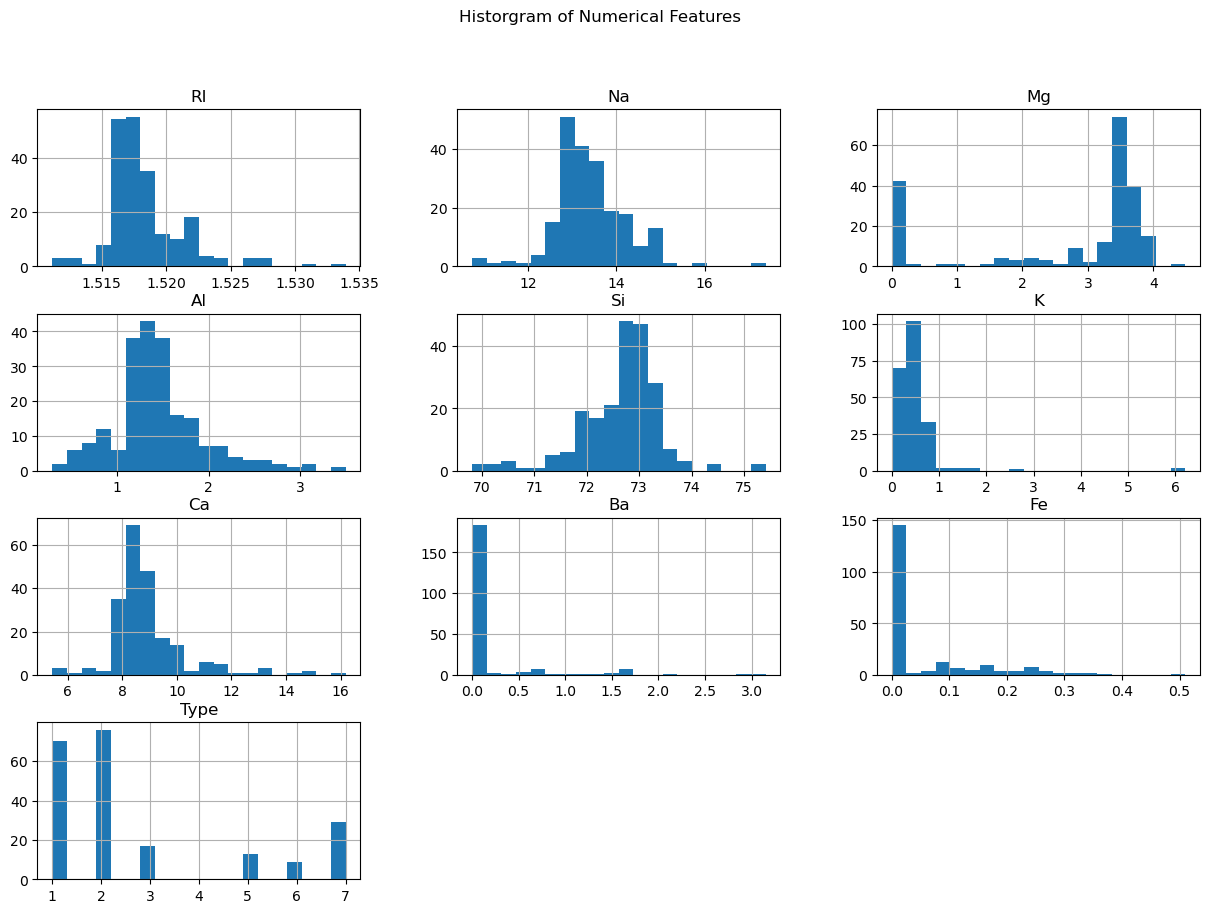

In [6]:
#Histogram for numerical Features
df.hist(bins=20,figsize=(15,10))
plt.suptitle('Historgram of Numerical Features')
plt.show()

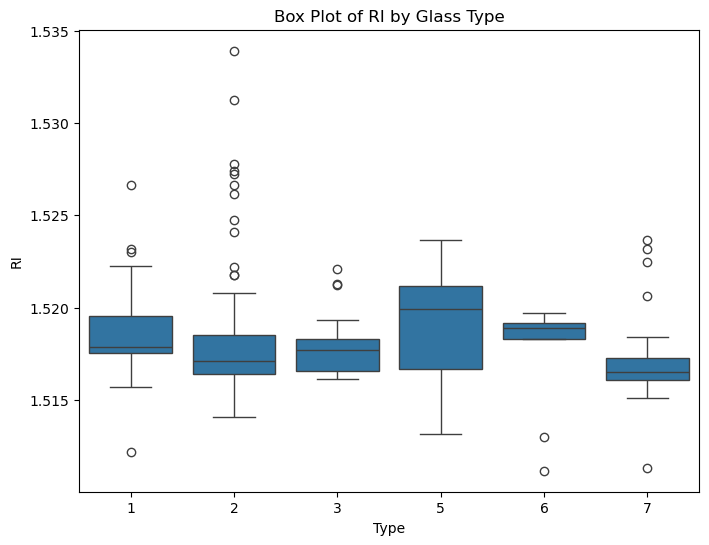

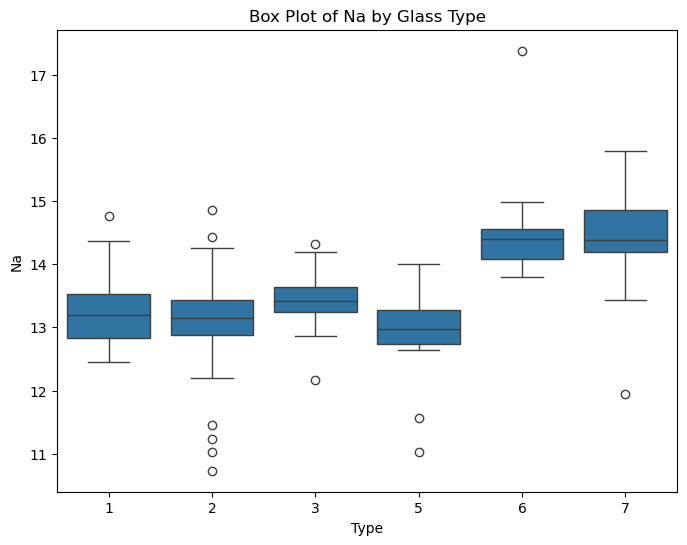

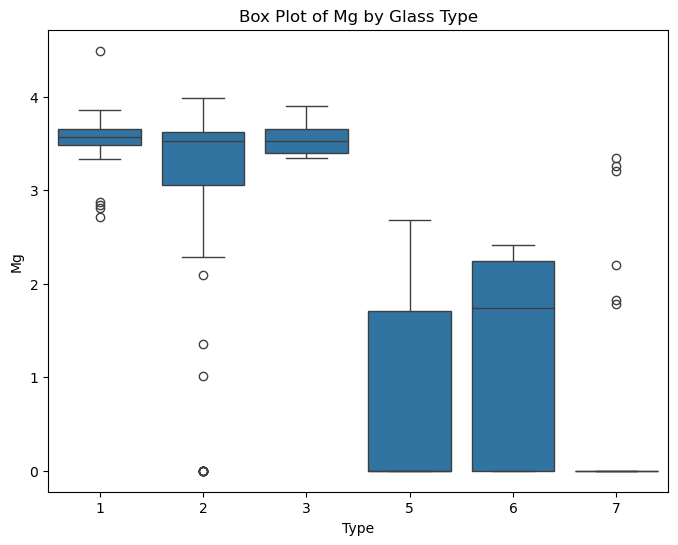

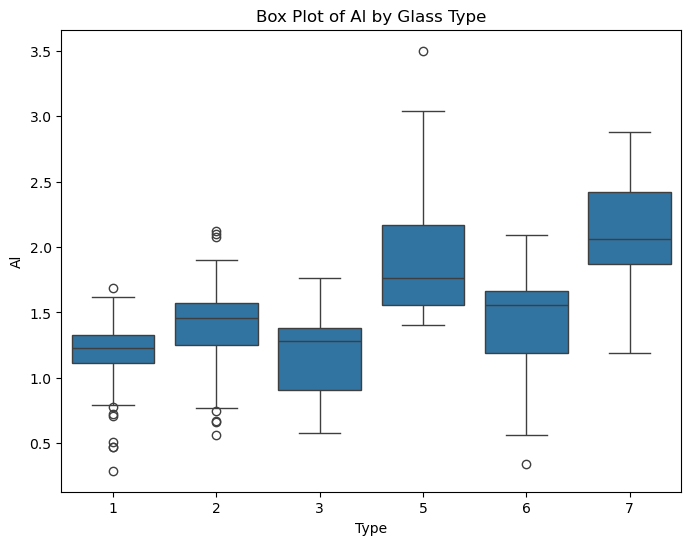

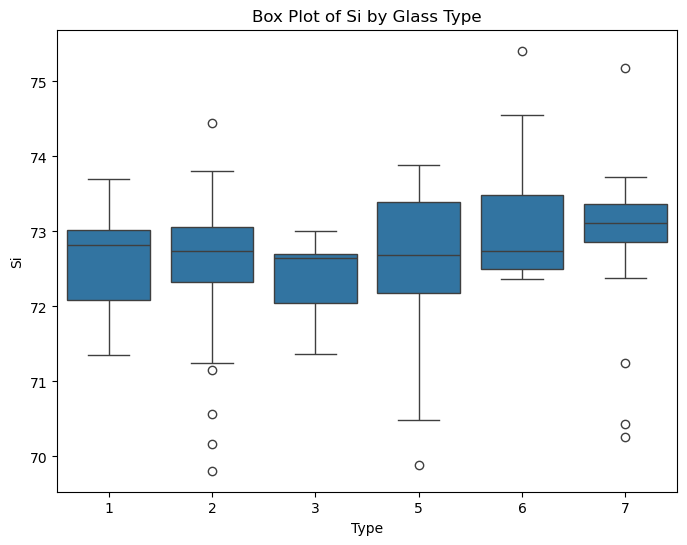

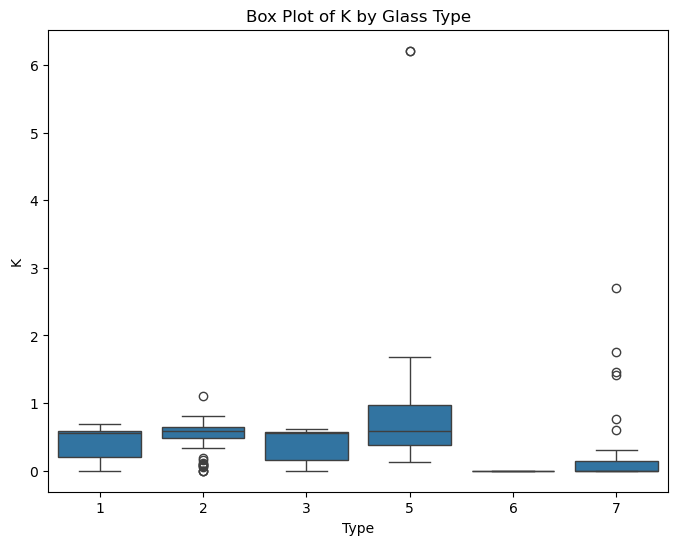

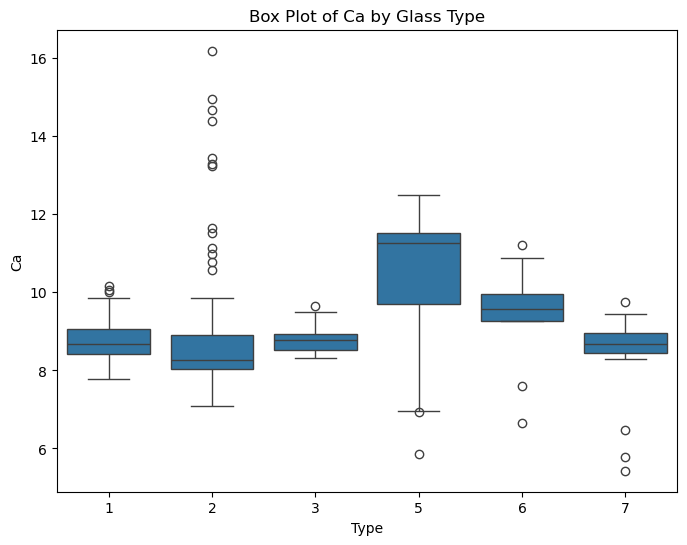

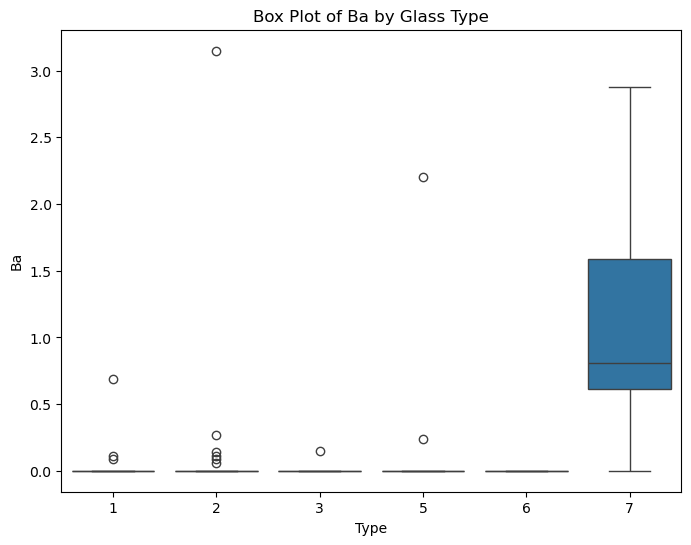

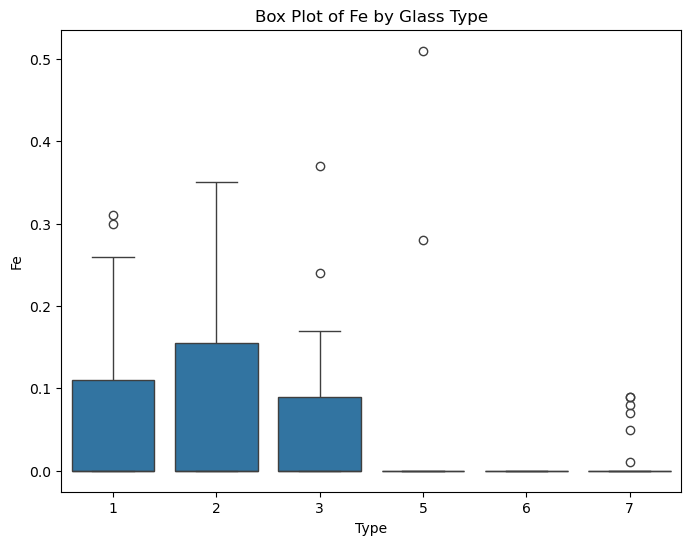

In [7]:
# Box plots to identify outliers
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Type', y=column, data=df)
    plt.title(f'Box Plot of {column} by Glass Type')
    plt.show()

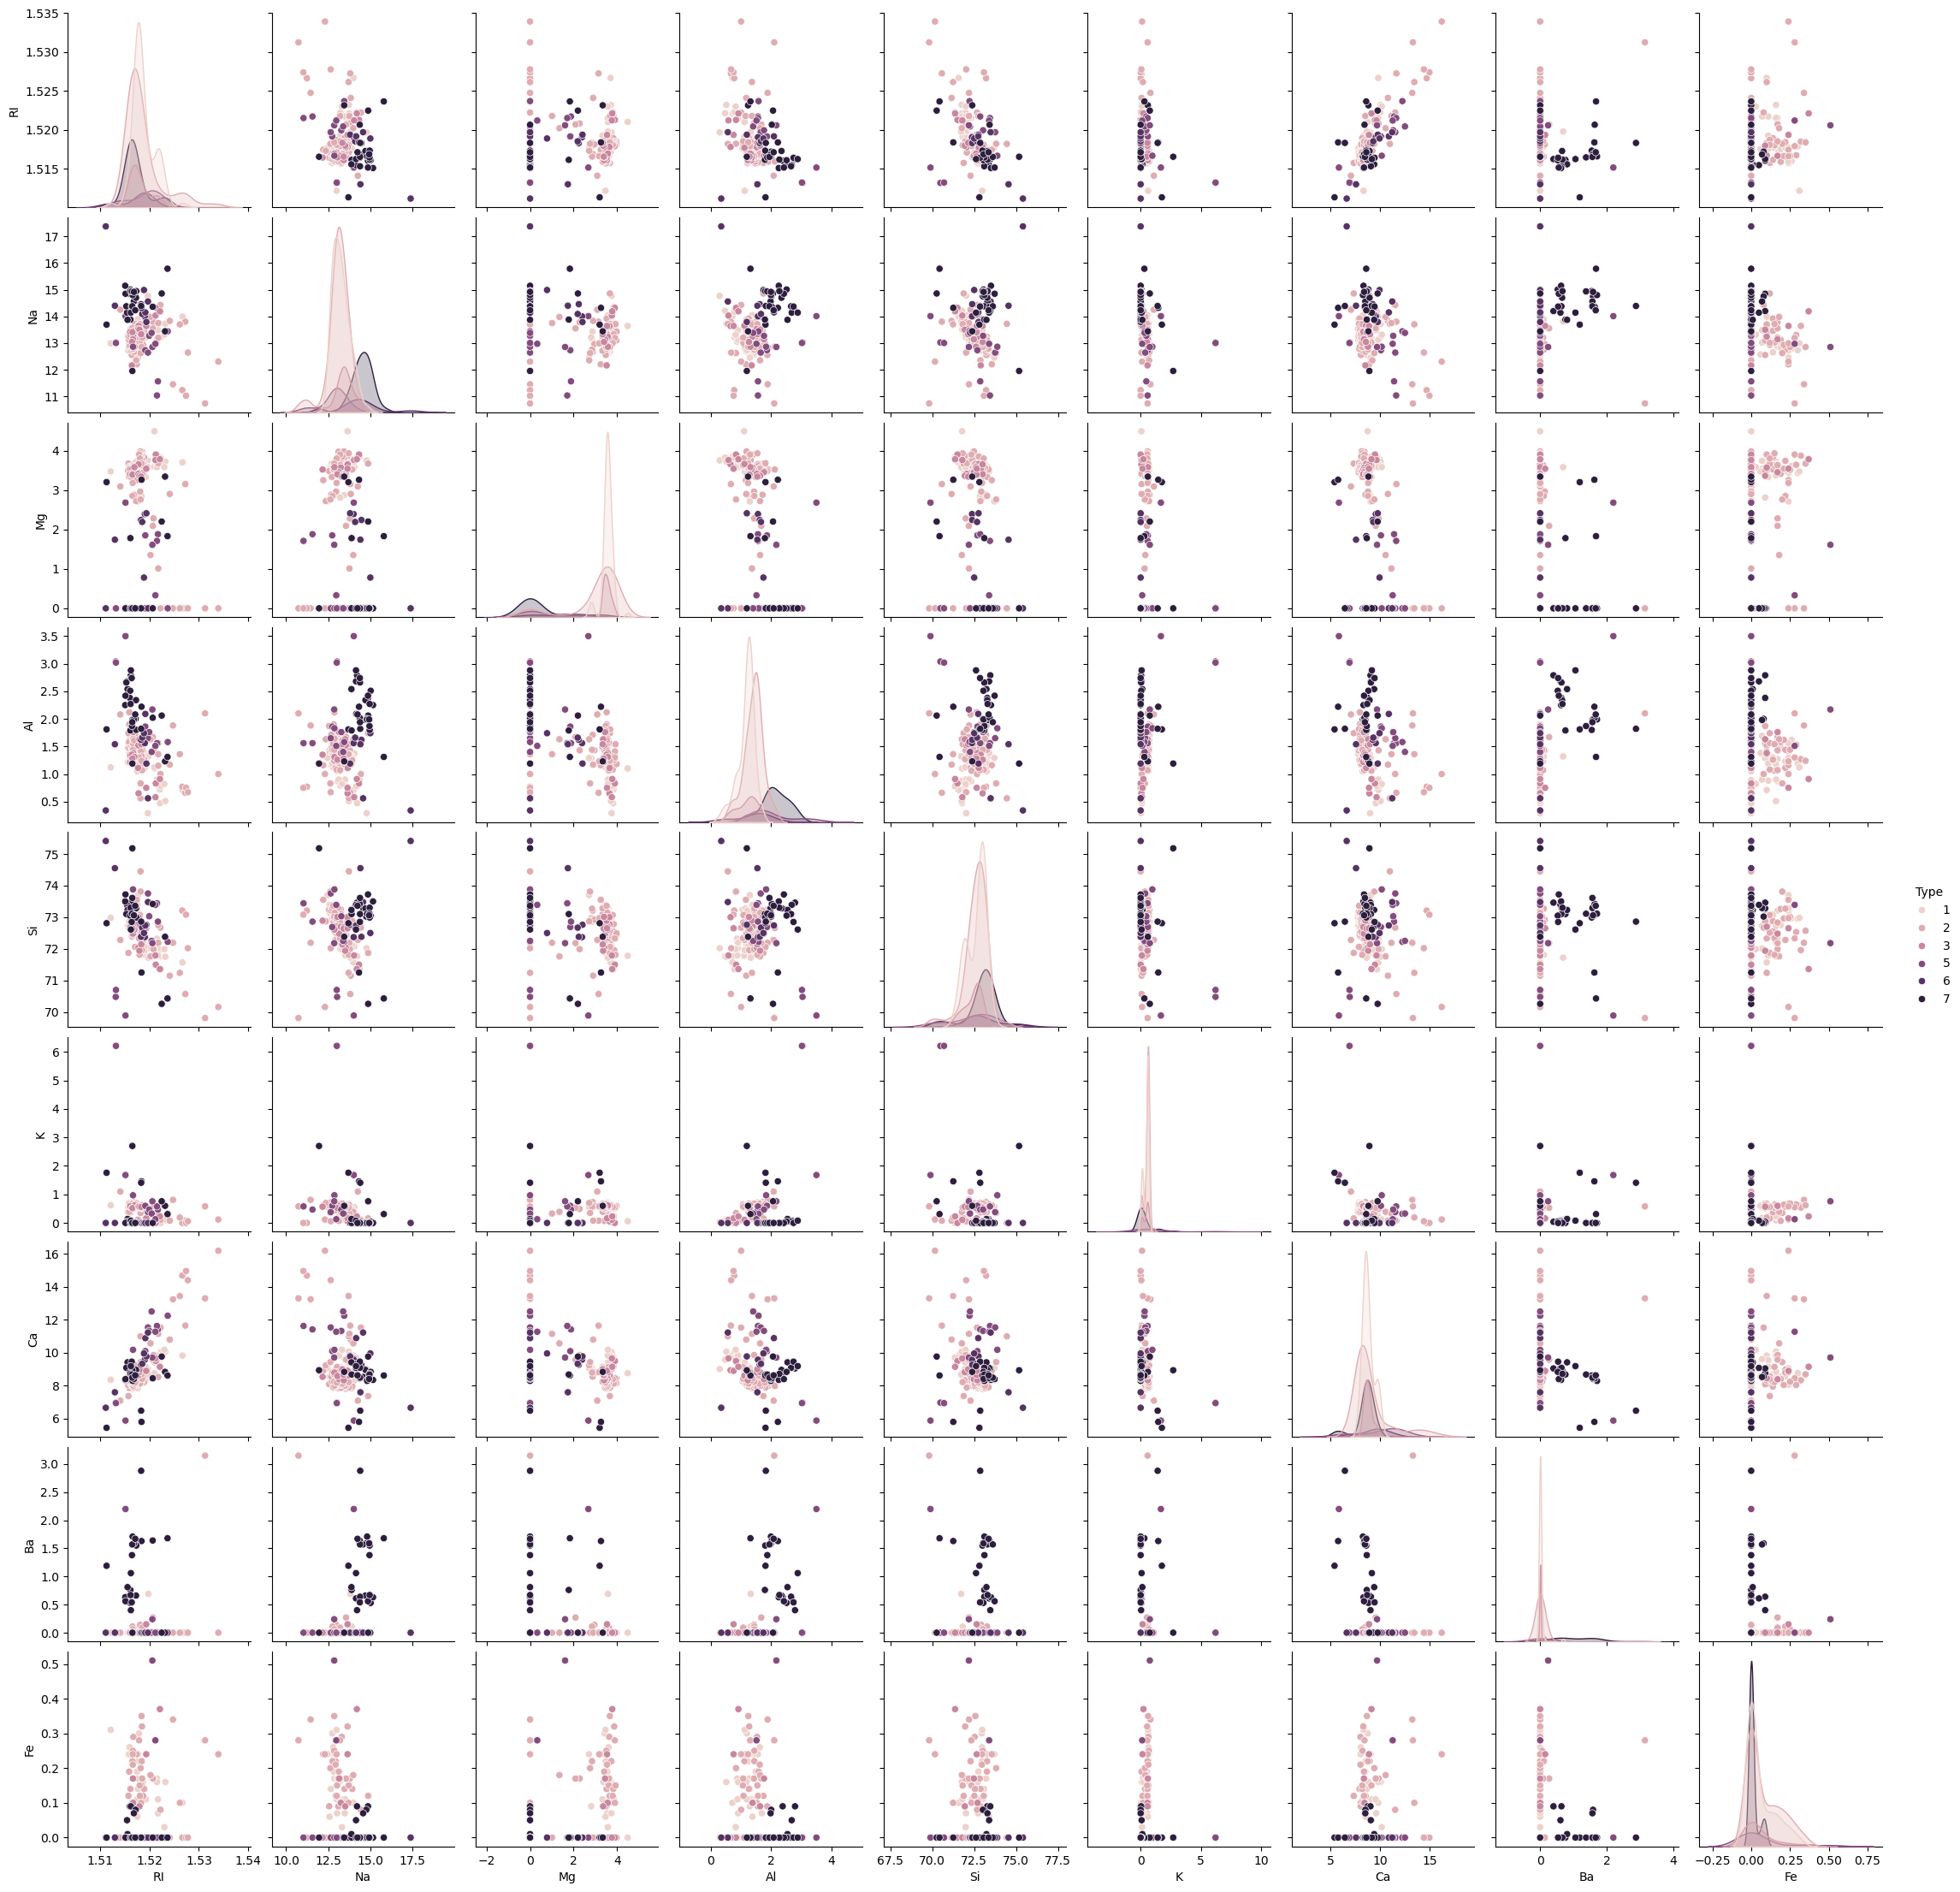

In [8]:
# Pairplot to see feature interactions
sns.pairplot(df, hue='Type')
plt.show()


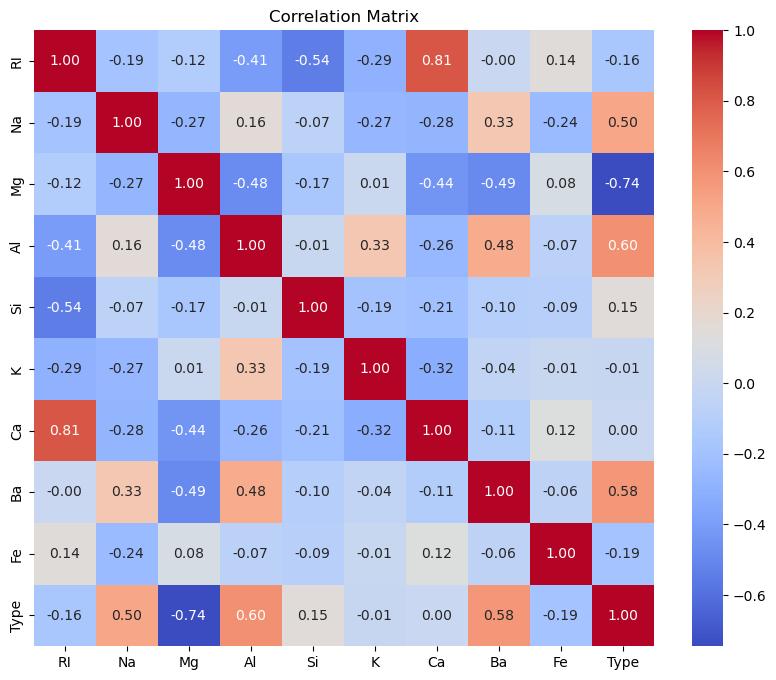

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 3.Data Preprocessing and Imbalance Handling

In [10]:
X = df.drop('Type', axis=1)
y = df['Type']

In [11]:
print(y.value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [12]:
# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [13]:
print(y_resampled.value_counts())

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [14]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## 4. Random Forest Model Implementation

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)


In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred= rf_model.predict(X_test)

In [18]:
# Evaluation
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Random Forest Performance:
Accuracy: 0.9124087591240876
Precision: 0.9148458368854788
Recall: 0.9123847167325428
F1 Score: 0.9096142974611986


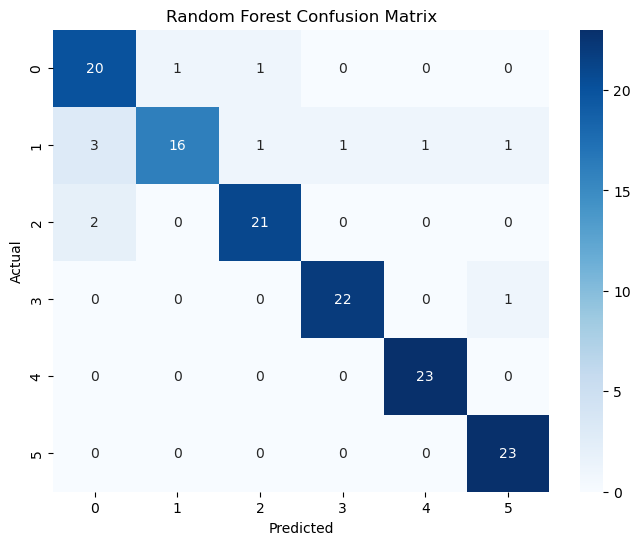

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5. Bagging and Boosting Methods

In [20]:
# Bagging (Parallel Ensemble)
bag = BaggingClassifier(n_estimators=100, random_state=42, n_jobs=-1)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

In [21]:
# Boosting (Sequential Ensemble)
boost = AdaBoostClassifier(n_estimators=100, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)

In [22]:
# Compare performance
print("Bagging F1 Score:", f1_score(y_test, y_pred_bag, average='macro'))
print("Boosting F1 Score:", f1_score(y_test, y_pred_boost, average='macro'))

Bagging F1 Score: 0.8870211250530399
Boosting F1 Score: 0.5533475846478942


In [23]:
# Plotting comparison
models = ['Random Forest', 'Bagging', 'Boosting']
f1_scores = [f1_score(y_test, y_pred, average='macro'), 
             f1_score(y_test, y_pred_bag, average='macro'),
             f1_score(y_test, y_pred_boost, average='macro')]

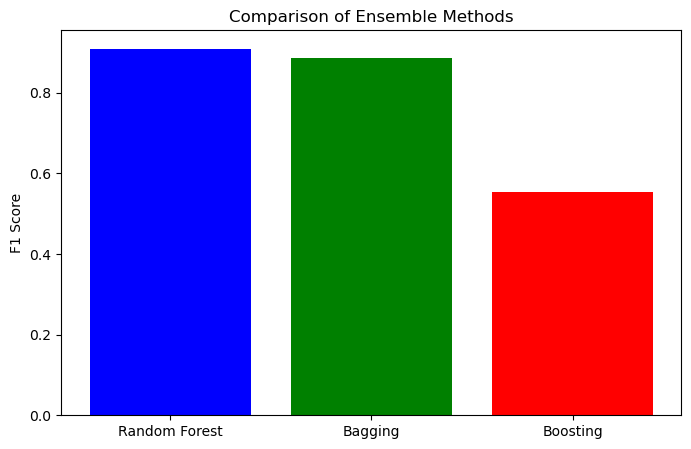

In [24]:
plt.figure(figsize=(8,5))
plt.bar(models, f1_scores, color=['blue','green','red'])
plt.ylabel("F1 Score")
plt.title("Comparison of Ensemble Methods")
plt.show()

**Additional Notes:**
**1. Explain Bagging and Boosting methods. How is it different from each other.**

**Bagging and Boosting Methods**

**Bagging (Bootstrap Aggregating):**

Bagging is an ensemble learning technique that reduces variance and improves model stability.
In bagging, multiple base models (usually the same type, e.g., decision trees) are trained in parallel on different random subsets of the training data created using bootstrap sampling (sampling with replacement).
The final prediction is made by majority voting (for classification) or averaging (for regression).
**Example:** Random Forest is a type of bagging method where many decision trees are combined.

**Boosting:**

Boosting is an ensemble technique that focuses on reducing bias and improving model performance sequentially.
In boosting, models are trained one after another, and each subsequent model tries to correct the errors made by the previous model.
The predictions of all models are combined, usually through a weighted vote (for classification) or weighted sum (for regression).
**Example:** AdaBoost, Gradient Boosting, and XGBoost.

Key Differences Between Bagging and Boosting:

Aspect	Bagging	Boosting
Training	Parallel	Sequential
Goal	Reduce variance	Reduce bias
Focus on errors	No	Yes (focuses on misclassified samples)
Risk of overfitting	Less likely	More likely if not tuned
Example	Random Forest	AdaBoost, Gradient Boosting
                                
**2. Explain how to handle imbalance in the data.**

Imbalanced data occurs when one class has many more samples than others, causing the model to favor the majority class.
Problems: Poor performance on minority classes; low recall for minority.
Ways to Handle Imbalance:

**Oversampling:**

Increase the number of samples in the minority class.
SMOTE (Synthetic Minority Oversampling Technique): Creates synthetic samples for minority classes rather than just duplicating them.

**Undersampling:**

Reduce the number of samples in the majority class.
Useful if the dataset is very large.

**Class Weighting:**

Assign higher weights to minority class samples during training.
Many classifiers like Random Forest, SVM, and Logistic Regression support class_weight='balanced'.

**Ensemble Methods:**

Use ensemble techniques like Balanced Random Forest or Boosting that can handle class imbalance.

**In assignment:** I used SMOTE to balance the classes before training the Random Forest, Bagging, and Boosting models.